# Infopillar Solutions


# Task 2- Fake News Detection

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [3]:
dataset = pd.read_csv('news.csv')
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# Shape Of Dataset
dataset.shape

(6335, 4)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
dataset.drop("Unnamed: 0", axis=1, inplace=True)

##

## Data Cleaning

### Check for NaN values

In [8]:
dataset.isnull().sum()

title    0
text     0
label    0
dtype: int64

### Check for Duplicate Values

In [9]:
dataset.duplicated().sum()

29

In [10]:
# Droping the dupicates
dataset.drop_duplicates(keep='first', inplace=True)

## Data Visualization

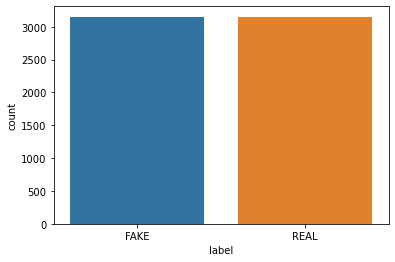

In [11]:
sns.countplot(data=dataset, x='label')
plt.show()

## Text Preprocessing

- Lower Case
- Tokenization
- Removing Special Characters
- Removing Stop words and punctuation
- Stemming

In [14]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer

ps = PorterStemmer()
STOPWORDS = set(stopwords.words('english'))

In [15]:
def tranform_text(text):
    text = text.lower()     # Converting to lower case

    word_arr = nltk.word_tokenize(text)     # Tokenizing
    correct = []

    for word in word_arr:
        if (word.isalnum()) and (word not in STOPWORDS) and (word not in punctuation):      # Removal of special char, stop words, punctuation
            correct.append(ps.stem(word))                                                        # Stemming

    return " ".join(correct)

In [19]:
dataset['title'] = dataset['title'].apply(tranform_text)
dataset['text'] = dataset['text'].apply(tranform_text)

In [20]:
dataset.head()

,title,text,label
0,smell hillari fear,daniel greenfield shillman journal fellow free...,FAKE
1,watch exact moment paul ryan commit polit suic...,googl pinterest digg linkedin reddit stumbleup...,FAKE
2,kerri go pari gestur sympathi,secretari state john kerri said monday stop pa...,REAL
3,berni support twitter erupt anger dnc tri warn,kayde king kaydeek novemb 9 2016 lesson tonigh...,FAKE
4,battl new york primari matter,primari day new york hillari clinton donald tr...,REAL


## Model Formation

### Text to Vectors

In [45]:
# Using TF-IDF for Vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(max_features=3000)
tfidf_text = TfidfVectorizer(max_features=25000)

In [46]:
title = tfidf_title.fit_transform(dataset['title']).toarray()
text = tfidf_text.fit_transform(dataset['text']).toarray()

In [47]:
print("Shape of Transformed Title :-> ",title.shape) 
print("Shape of Transformed Text :-> ",text.shape) 

Shape of Transformed Title :->  (6306, 3000)
Shape of Transformed Text :->  (6306, 25000)


In [48]:
df_title = pd.DataFrame(title)
df_text = pd.DataFrame(text)

In [49]:
df = pd.concat([df_title, df_text], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Converting Categories of Target into Numeric

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(dataset['label'])

### Spliting the data into Training Data and Testing Data

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=1)

### Evaluation

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return round(accuracy,4), cf_matrix, round(precision,4)

### Applying Allogrithms

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
pac = PassiveAggressiveClassifier()

In [54]:
print("Gaussian Naive Bayse :-> ")
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy, gnb_cf_mat, gnb_precision = evaluate(y_test, gnb_pred)
print("Accuracy : ", gnb_accuracy)
print("Precision Score : ", gnb_precision)
print("Confusion Matrix : ")
print(gnb_cf_mat)

Gaussian Naive Bayse :-> 
Accuracy :  0.7892
Precision Score :  0.7917
Confusion Matrix : 
[[502 130]
 [136 494]]


In [55]:
print("Multinomial Naive Bayse :-> ")
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_accuracy, mnb_cf_mat, mnb_precision = evaluate(y_test, mnb_pred)
print("Accuracy : ", mnb_accuracy)
print("Precision Score : ", mnb_precision)
print("Confusion Matrix : ")
print(mnb_cf_mat)

Multinomial Naive Bayse :-> 
Accuracy :  0.8811
Precision Score :  0.838
Confusion Matrix : 
[[517 115]
 [ 35 595]]


In [56]:
print("Bernoullie Naive Bayse :-> ")
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_accuracy, bnb_cf_mat, bnb_precision = evaluate(y_test, bnb_pred)
print("Accuracy : ", bnb_accuracy)
print("Precision Score : ", bnb_precision)
print("Confusion Matrix : ")
print(bnb_cf_mat)

Bernoullie Naive Bayse :-> 
Accuracy :  0.8074
Precision Score :  0.8512
Confusion Matrix : 
[[550  82]
 [161 469]]


In [58]:
print("Passive Aggressive Classifier :-> ")
pac.fit(X_train, y_train)
pac_pred = pac.predict(X_test)
pac_accuracy, pac_cf_mat, pac_precision = evaluate(y_test, pac_pred)
print("Accuracy : ", pac_accuracy)
print("Precision Score : ", pac_precision)
print("Confusion Matrix : ")
print(pac_cf_mat)

Passive Aggressive Classifier :-> 
Accuracy :  0.9184
Precision Score :  0.9341
Confusion Matrix : 
[[592  40]
 [ 63 567]]


Best Model is Passive Aggressive Classifier 